# <img style="float: left; padding-right: 10px; width: 45px"> GEC AI HUB: Introduction to Data Science and Machine Learning



## Lab 4:  Neural Networks and BackPropagation

**GEC AI Hub**<br>
**Summer 2019**<br>
**Instructors:** Pavlos Protopapas<br>
**Lab Instructors:** Patrick Ohiomoba and Esteban Reyes<br>

---

In [54]:
## RUN THIS CELL TO PROPERLY HIGHLIGHT THE EXERCISES
import requests
from IPython.core.display import HTML
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

## Learning Goals
In this lab, we'll begin our exploration of neural networks, function approximation, the perceptron and back-propagation.  We'll even beginto explore one of the major packages for working with neural networks and deep neural networks:

By the end of this lab, you should:

- Be familiar with neural networks as a mechanism for function approximation
- Be familiar with building a very basic neural network from scratch
- Have installed tensorflow and keras
- Be familiar with building a very basic perceptron in keras.
 

In [55]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn.apionly as sns
sns.set_style("whitegrid")
sns.set_context("poster")

# helpers
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

## Starting with a Single Node

We begin with a single node (alsoe called a neuron).

![perceptron](figs/perceptron.png)

There are some inputs $x$, which get combined into an auxilliary variable $z$.  The auxilliary variable is passed through the activation function $\sigma\left(z\right)$ and the result is the output.

Here is another image showing each step.

![](figs/expanded-perceptron.png)

Notice that the inputs are linearly combined according to some weights $w$ and a bias $b$.  This transformation is also sometimes called and *affine* transformation.  The perceptron transforms the weighted inputs according to the rule of the activation function.  For a single perceptron, the output $y$ is just the output from the perceptron.  The linear transformation and activation of the neuron occur within a single *layer* of the network (shown in the dotted box).

### Example
The task is to approximate (or learn) a function $f\left(x\right)$ given some input $x$.  For demonstration purposes, the function we will try to learn is a Gaussian function $$f\left(x\right) = \exp\left(-x^{2}\right).$$  Even though we represent the input $x$ as a vector on the computer, you should think of it as a single input.  For example, we're not passing $x$ and $y$ into the network.

In [56]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # The real function

Let's see what the single-layer, single neuron network give us.  We have a couple of choices to make:
1. We must choose some weights and some biases
2. We must choose an activation function

For now, we will manually specify the weights and biases.

We choose a *sigmoid* activation function $$\sigma\left(x\right) = \dfrac{1}{1 + e^{-z}}.$$  What are the limits $\displaystyle\lim_{z\to\infty}\sigma\left(z\right)$ and $\displaystyle\lim_{z\to-\infty}\sigma\left(z\right)$?  Actually, the sigmoid we have here is called the *logistic* function.  Sigmoids are really a family of functions and the logistic function is just one member in that family.

There are other activation functions as well.  For example:
* Rectified linear unit:  $$\sigma\left(z\right) = \text{max}\left(0, z\right)$$
* Hyperbolic tangent:  $$\sigma\left(z\right) = \tanh\left(z\right)$$

Choosing the correct activation function is a really big deal.  Notice that the activation functions we've mentioned so far have the feature that they "turn on" at some point and "saturate" at some point.

We will examine different activation functions later.  Okay, enough talk.  Let's code up the sigmoid.

In [57]:
# Manually specify the weight and bias
w = -4.5 # weight
b = 3.0 # bias

# Perceptron output
z = w * x + b # Linear transformation
h = 1.0 / (1.0 + np.exp(-z)) # Sigmoid activation

And now we plot the activation function and the true function.

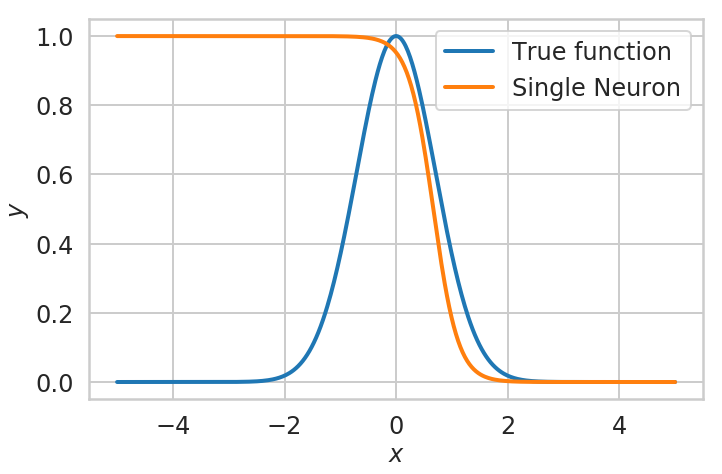

In [58]:
fig, ax = plt.subplots(1,1, figsize=(11,7)) # create axes object

# Plot
ax.plot(x, f, lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

The prediction looks awful.  But we expected that.  The single perceptron simple turns the output on and off at some point, but that's about it.  We see that the neuron is on until about $x=0$ at which point it abruptly turns off.  It's able to get "close" to the true function just by luck.  Otherwise, it has nothing in common with the true function.

What do you think will happen if you change $w$ and $b$?

**Exercise**: 

Write two `Python` functions:
1. The first function should return an affine transformation of the data for a single perceptron.  Here's the required interface:
```python
def affine(x, w, b):
    """Return affine transformation of x
    
    INPUTS
    ======
    x: A numpy array of points in x
    w: A float representing the weight of the perceptron
    b: A float representing the bias of the perceptron
    
    RETURN
    ======
    z: A numpy array of points after the affine transformation
       z = wx + b
    """
    
    # Code goes here
    return z
```
2. The second function should return the sigmoid activation function.  Here's the required interface:
```python
def sigmoid(z):
    # Code goes here
    return h
```

#### Part 2
* Using your two functions, recreate the example from class
* Try to change the weight and bias to get a better fit


#### Comments
* We say that the activation occurs when $\sigma = \dfrac{1}{2}$.  We can show that this corresponds to $x = -\dfrac{b}{w}$.
* The "steepness" of the sigmoid is controlled by $w$.

In [59]:
# Your code here

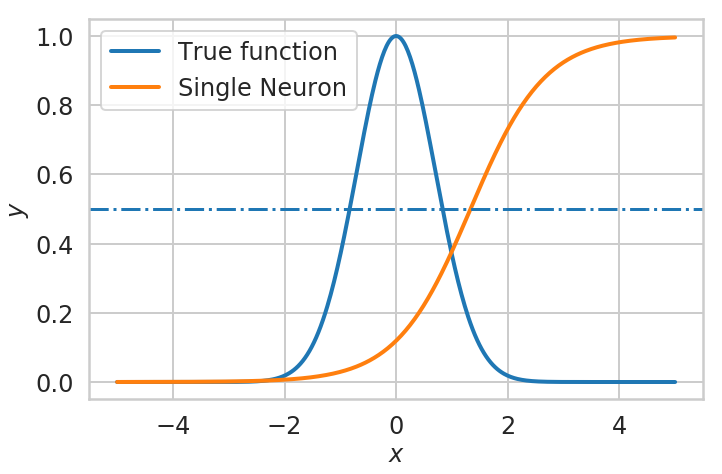

In [60]:
def affine(x, w, b):
    return w * x + b

def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = 1.5
b = -2.0

h = sigmoid(affine(x, w, b))

# Plot
fig, ax = plt.subplots(1,1, figsize=(11,7))
ax.plot(x, f, lw=4, label=r'True function')
ax.plot(x, h, lw=4, label=r'Single Neuron')
ax.axhline(y=0.5, linestyle='-.')
# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=2) # Create a legend and make it big enough to read

Great!

#### Important Observation
Notice that we wrote the output as `sigmoid(affine(x))`.  This was not a coincidence.  It looks like a composition of functions.  In fact, that is what a neural network is doing.  It's building up an approximation to a function by creating a composition of functions.  For example, a composition of three functions would be written as $$\varphi_{3}\left(\varphi_{2}\left(\varphi_{1}\left(x\right)\right)\right).$$

What happens if we play with the weights and biases?

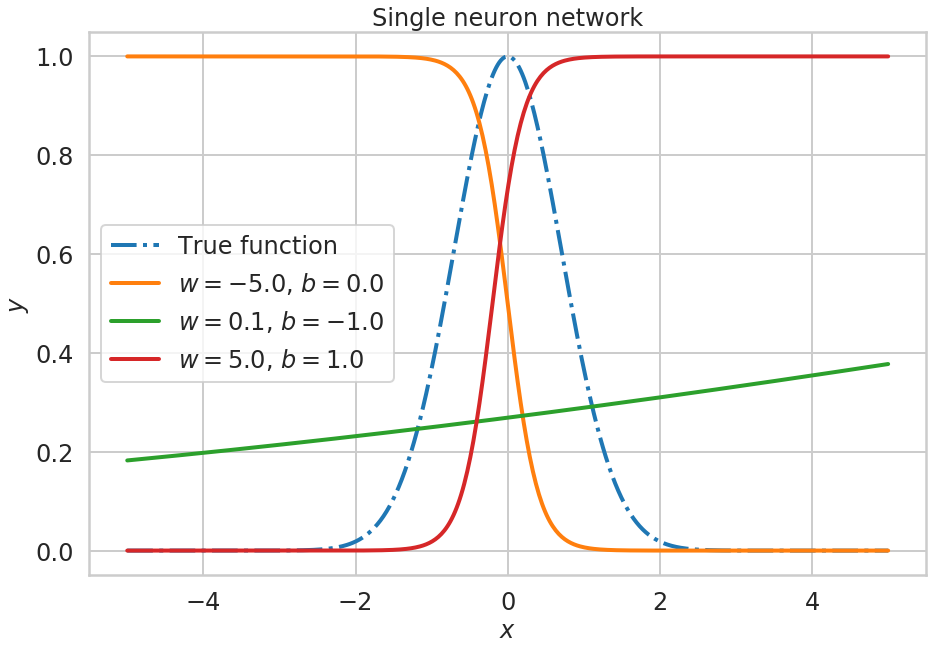

In [61]:
w = [-5.0, 0.1, 5.0] # Create a list of weights
b = [0.0, -1.0, 1.0] # Create a list of biases

fig, ax = plt.subplots(1,1, figsize=(15,10))
ax.plot(x, f, lw=4, ls='-.', label='True function')
for wi, bi in zip(w, b):
    h = sigmoid(affine(x, wi, bi))
    ax.plot(x, h, lw=4, label=r'$w = {{{0}}}$, $b = {{{1}}}$'.format(wi,bi))

ax.set_title('Single neuron network', fontsize=24)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best') # Create a legend and make it big enough to read

We didn't do an exhaustive search of the weights and biases, but it sure looks like this single perceptron is never going to match the actual function.  Again, we shouldn't be suprised about this.  The output layer of the network is simple the logistic function, which can only have so much flexibility.

Not all hope is lost!  We may be able to make our network more flexible by using more nodes.

## Multiple Perceptrons in a Single Layer
It appears that a single neuron is somewhat limited in what it can accomplish.  What if we expand the number of neurons in our network?  We have two obvious choices here.  One option is to add depth to the network by putting neurons next to each other.  We won't take that path yet.  The other option is to stack neurons on top of each other.  Now the network has some width, but is still only one layer deep.

The following figure shows a single-layer network with two nodes in one layer.

![](figs/multiple-perceptrons.png)

#### Some observations
1. We still have a single input in this case.  Note that this is not necessary in general.  We're just keeping things simple with a single input for now.
2. Each node (or neuron) has a weight and bias associated with it.  An affine transformation is performed for each node.
3. Both nodes use the same activation function form $\sigma\left(\cdot\right)$ on their respective inputs.
4. The outputs of the nodes must be combined to give the overall output of the network.  There are a variety of ways of accomplishing this.  In the current example, we just take a linear combination of the node outputs to produce the actual prediction.  Notice that now we have weights and biases at the output too.

Let's see what happens in this case.  First, we just compute the outputs of each neuron.

In [62]:
x = np.linspace(-5.0, 5.0, 500) # input points
f = np.exp(-x*x) # data

w = np.array([1.5, -2.5])
b = np.array([0.4, -2.0])

# Affine transformations
z1 = w[0] * x + b[0]
z2 = w[1] * x + b[1]

# Node outputs
h1 = 1.0 / (1.0 + np.exp(-z1))
h2 = 1.0 / (1.0 + np.exp(-z2))

Now let's plot things and see what they look like.

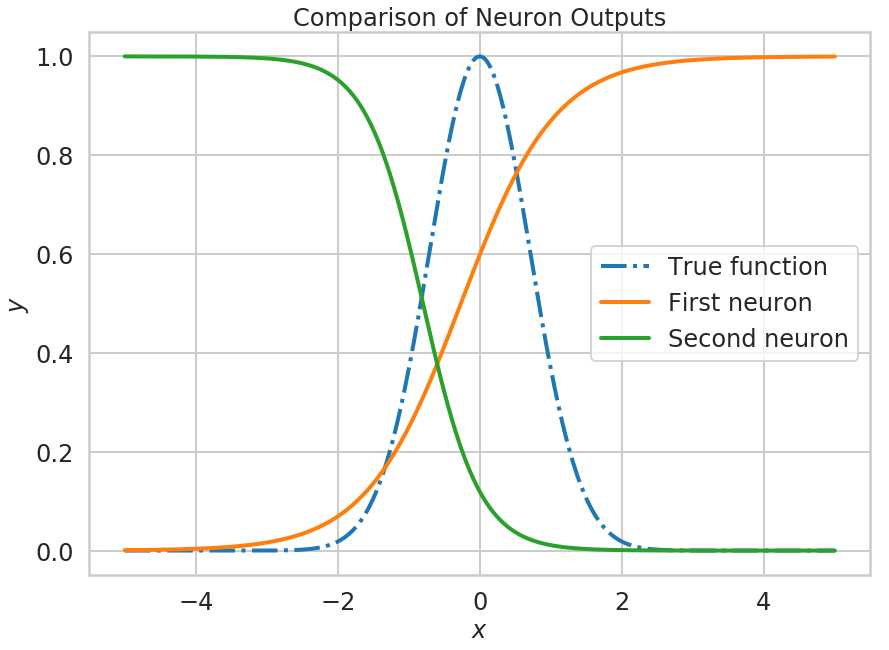

In [63]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
ax.plot(x, h1, lw=4, label='First neuron')
ax.plot(x, h2, lw=4, label='Second neuron')

# Set title
ax.set_title('Comparison of Neuron Outputs', fontsize=24)

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best') # Create a legend and make it big enough to read

Just as we expected.  Some sigmoids.  Of course, to get the network prediction we must combine these two sigmoid curves somehow.  First we'll just add $h_{1}$ and $h_{2}$ without any weights to see what happens.

#### Note
We are **not** doing classification here.  We are trying to predict an actual function.  The sigmoid activation is convenient when doing classification because you need to go from $0$ to $1$.  However, when learning a function, we don't have as good of a reason to choose a sigmoid.

In [64]:
# Network output
wout = np.ones(2) # Set the output weights to unity to begin
bout = 0.0 # No bias yet
yout = wout[0] * h1 + wout[1] * h2 + bout

And plot.

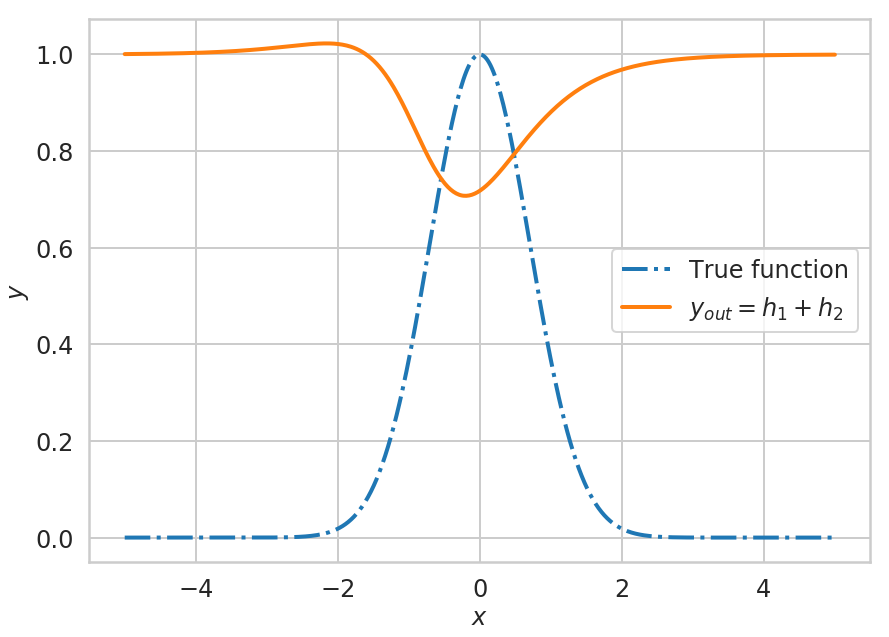

In [65]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, ls='-.', lw=4, label=r'True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = h_{1} + h_{2}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=24) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc='best') # Create a legend and make it big enough to read

#### Observations
* The network prediction is still really bad.
* *But*, it is pretty sophisticated.  We just have two neurons, but we get some pretty interesting behavior.
* We should be cautiously optimistic.

We didn't do anything with the output weights.  Those are probably important.  Now let's see what happens when we change the weights on the output.

In [66]:
# Network output
wout = np.array([-3.46, -3.38])
bout = np.array(3.43)

yout = wout[0] * h1 + wout[1] * h2 + bout


wout_mixture = np.array([-3.46, -3.38])
bout_mixture = np.array(3.43)
yout_m = wout_mixture[0] * h1 + wout_mixture[1] * h2 + bout_mixture


wout_kindafit = np.array([-3.44, -3.39])
bout_kindafit = np.array(3.43)
yout_kf = wout_kindafit[0] * h1 + wout_kindafit[1] * h2 + bout_kindafit


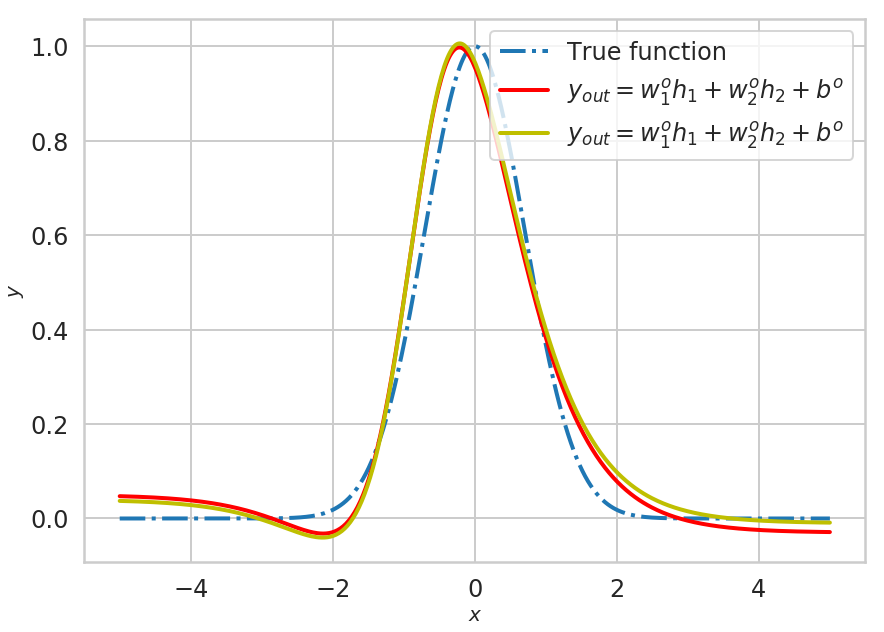

In [67]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls = '-.', label='True function')
#ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')
ax.plot(x, yout_m, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$', c='r')
ax.plot(x, yout_kf, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$',c='y')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

Very cool!  The two nodes interact with each other to produce a pretty complicated-looking function.  It still doesn't match the true function, but now we have some hope.  In fact, it's starting to look a little bit like a Gaussian!

I bet we can do better.  There are three obvious options at this point:
1. Change the number of nodes
2. Change the activation functions
3. Change the weights

### Some Mathematical Notation
Before proceeding, let's learn a more succint way of doing the calculations.  If you have a network with a lot of nodes, then you probably don't want to manually determine the output of each node.  It will take forever.  Instead, you can package the computations up using a more compact notation.  We'll illustrate the ideas with the two-node network.

Suppose we have a single input $x$ to a single-layer two-node network.  We can store the weights from each node in a vector $\mathbf{w} \in \mathbb{R}^{2}$.  Similarly, we can store the biases from each node in a vector $\mathbf{b} \in \mathbb{R}^{2}$.  The affine transformation is then written as $$\mathbf{z} = \mathbf{w}x + \mathbf{b}$$ where the usual laws of vector addition and multiplication by a scalar apply.  Of course, we have that $\mathbf{z} \in \mathbb{R}^{2}$ as well.  Next we evaluate the output from each node.  Formally, we write $$\mathbf{h} = \sigma\left(\mathbf{z}\right)$$ where, once again, $\mathbf{h}\in\mathbb{R}^{2}$.  Moreover, it is *understood* that $\sigma$ operates on each individual element of $\mathbf{z}$ separately.  If we denote each component of $\mathbf{z}$ by $z_{j}, \ j = 1, 2$ then we can write $$h_{j} = \sigma\left(z_{j}\right), \quad j = 1, 2.$$

Lastly, we must do something about the output layer.  Mathematically we write $$y_{out} = \mathbf{w}_{out} \cdot \mathbf{h} + b_{out}$$ where $\mathbf{w}_{out} \in \mathbb{R}^{2}$ and $b_{out} \in \mathbb{R}$.

### Comments on the Implementation
Mathematically, this all makes perfect sense.  There is a slight wrinkle when we get to the implementation.  The reason is that $x$ must be stored as a vector (or array) on the computer!  When we do that, we must be very careful in telling the computer how to perform the multiplications.

#### Example A
Suppose we have just stored three points in $x$ on the computer and store $x$ in an array.  Then we have 
\begin{align}
  x = \begin{bmatrix} x_{1} \ x_{2} \ x_{3} \end{bmatrix}.
\end{align}
When we write $\mathbf{w}x + \mathbf{b}$ the computer actually doesn't know what multiplication we want to do.  If we treat $x$ as though it has dimension $3 \times 1$ then simply multiplying $\mathbf{w}$ by $x$ will result in a dimension mismatch error.

#### Example B
What if we're at the output of the network?  Then $\mathbf{h}$ is stored as a $2 \times \text{num_points}$ array.  But $\mathbf{w}_{out}$ is a $2\times 1$ array!  To get the dot product right, we need to tell the computer to take the dot product on each column.  Here's the situation:
\begin{align}
  \mathbf{w}_{out} \cdot \mathbf{h} &= 
  \begin{bmatrix}
    w_{1}^{out} \ \ w_{2}^{out}
  \end{bmatrix}^{T}
  \begin{bmatrix}
    h_{11} & h_{12} & h_{13} \\
    h_{21} & h_{22} & h_{23}
  \end{bmatrix}
  \\
  &=
  \begin{bmatrix}
    w_{1}^{out}h_{11} + w_{2}^{out}h_{21} \qquad w_{1}^{out}h_{12} + w_{2}^{out}h_{22} \qquad w_{1}^{out}h_{13} + w_{2}^{out}h_{23}
  \end{bmatrix}
\end{align}

To overcome these problems, we can use the `numpy` [`tensordot`](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.tensordot.html) function.  That function allows us to directly specify how to perform the multiplication.  I would encourage you all to play around with `tensordot` to get used to the syntax.

The next example shows how to re-write our single-layer network using this succinct notation.

### Example
Write a function that can handle the above situations.

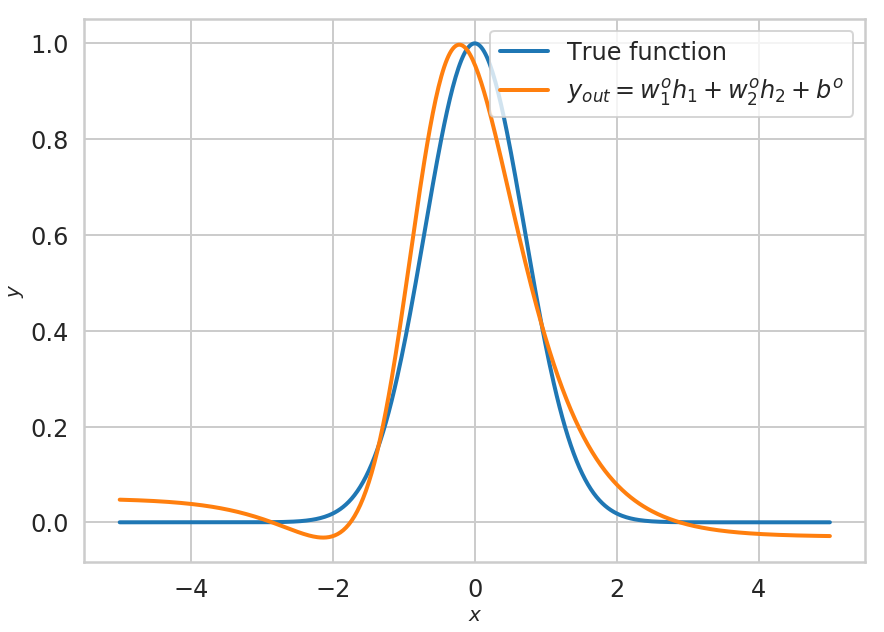

In [68]:
def nodes(x, w, b):
    z = np.tensordot(w, x, axes=0) + b.reshape((len(w),-1))
    return 1.0 / (1.0 + np.exp(-z))

def output(h, wout, bout):
    return np.tensordot(wout, h, axes=1) + bout

h = nodes(x, w, b)
yout = output(h, wout, bout)

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, label='True function')
ax.plot(x, yout, lw=4, label=r'$y_{out} = w_{1}^{o}h_{1} + w_{2}^{o}h_{2} + b^{o}$')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

We got the same result.  Good.  We're ready to try some more interesting things now.

## Changing Number of Nodes

We've got a nice new function that allows us to use an arbitrary number of nodes in a single-layer network.  Let's see what happens when we use a bunch of nodes.  What do you think will happen?

### Exercise
In this exercise, you will use the functions just provided to change the number of nodes in a layer.  Here's your task.

You are provided you with a code outline below.  Fill in the blanks.

In [69]:
# Your code here

In [70]:
num_nodes = [2, 4, 8, 16, 32]

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls ='-.', label='True function')

# Loop over list of nodes
for N in num_nodes:
    # Select node weights
    w = np.random.uniform(-3.0, 3.0, N) # randomly generate weights from uniform distribution
    b = # fill inv
    wo = # fill in
    bo =  # fill in
    
    h = # fill in
    yout = # fill in

    ax.plot(x, yout, lw=4, label=r'$N = {{{0}}}$'.format(N)) # Plot each solution

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

SyntaxError: invalid syntax (<ipython-input-70-23e555c5ecf5>, line 11)

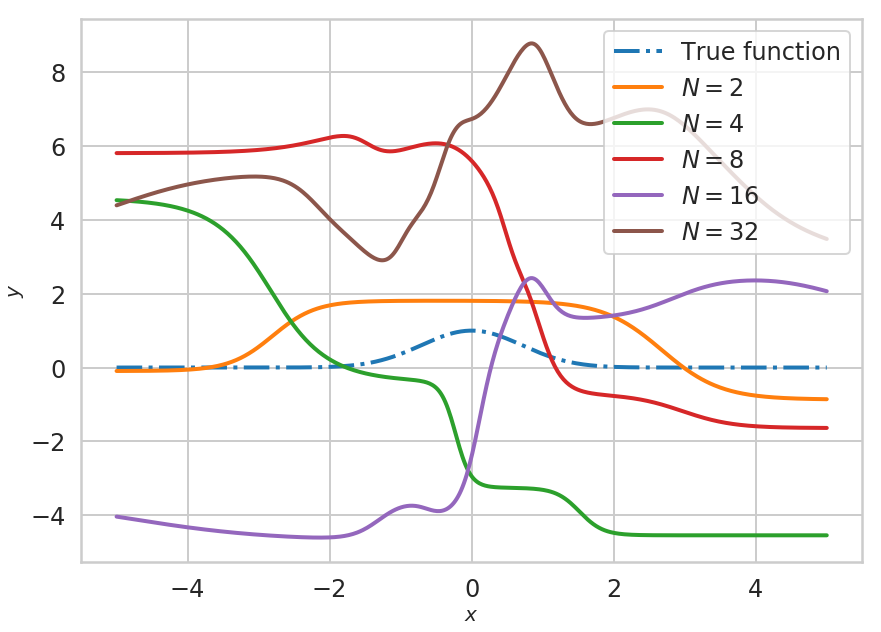

In [71]:
num_nodes = [2, 4, 8, 16, 32]

fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f, lw=4, ls ='-.', label='True function')

# Loop over list of nodes
for N in num_nodes:
    # Select node weights
    w = np.random.uniform(-10.0, 10.0, N)
    b = np.random.uniform(-10.0, 10.0, N)
    wout = np.random.uniform(-3.0, 3.0, N)
    bout = np.random.uniform(-3.0, 3.0, 1)
    
    h = nodes(x, w, b) # node outputs
    yout = output(h, wout, bout) # network output

    ax.plot(x, yout, lw=4, label=r'$N = {{{0}}}$'.format(N))

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

That's a little disappointing.  We're getting more complex behavior in our predictions, but they're still barely matching the true function.  It could be our activation function choice (sigmoid).  Or (more likely) it's the weights that we are using.  Right now, we're just grabbing random weights.  Let's do a grid-search over the weights and biases and assess the affects.

## Changing Weights
To keep things simple, let's go back to the single layer, two-node network.

We'll do a grid search.  This means that we'll create a grid of weights for the first node, a grid of weights for the second node, a grid of biases for the first node, and a grid of biases for the second node.  Then, we'll loop over every single combination of weights and biases in our grid.  This is a very greedy and impractical way of doing things.  The scaling is terrible.  With just two nodes, we're searching a four dimensional space.  There are much more sophisticated algorithms out there, but we won't discuss those today.

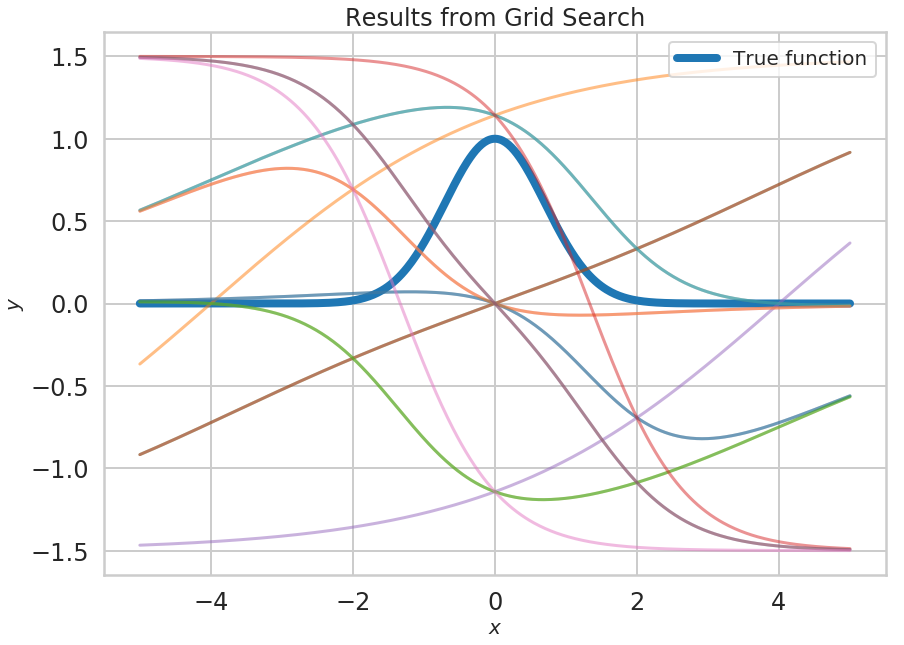

In [72]:
w_one = np.array([-0.5, 1.5])
w_two = np.array([-0.5, 1.5])

b_one = np.array([-2.0, 2.0])
b_two = np.array([-2.0, 2.0])

# Manually specify some output weights and bias
wout = np.array([-1.5, -1.5])
bout = np.array(1.5)

# Initiaize the plot
fig, ax = plt.subplots(1,1, figsize=(14,10))
ax.plot(x, f, lw=8, label='True function')

# Loop over the grid
for w1 in w_one:
    for w2 in w_two:
        w = np.array([w1, w2]) # Get the weights for each node
        for b1 in b_one:
            for b2 in b_two:
                b = np.array([b1, b2]) # Get the biases for each node
                h = nodes(x, w, b) # Outputs of the nodes
                yout = output(h, wout, bout) # Network output
                
                ax.plot(x, yout, lw=3, alpha=0.5) # Make a plot

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)
ax.set_title('Results from Grid Search', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(loc=1, fontsize=20)

That was a pretty expensive search and didn't learn very much.  In fact, we didn't even make a grid for the output weights and bias!

Another way to do a search is to draw samples from a distribution.  We could draw $w_{1}$ from a normal distribution $10^{5}$ times and do the same for the other weights and biases.  Then we could compute the function from the single-layer two-node network and compare it with the actual function.  This is what we do in the next example.  

We compare the two functions using the root mean square error, $$RMSE = \sqrt{\frac{1}{n_{points}}\sum_{i=1}^{n_{points}}{\left(f_{i} - y^{out}_{i}\right)^{2}}}.$$  The weights and biases are drawn from a normal distribution centered about the points we found earlier.  The best result is stored and compared with the actual function.

The minimum RMSE was 0.11170578434130347


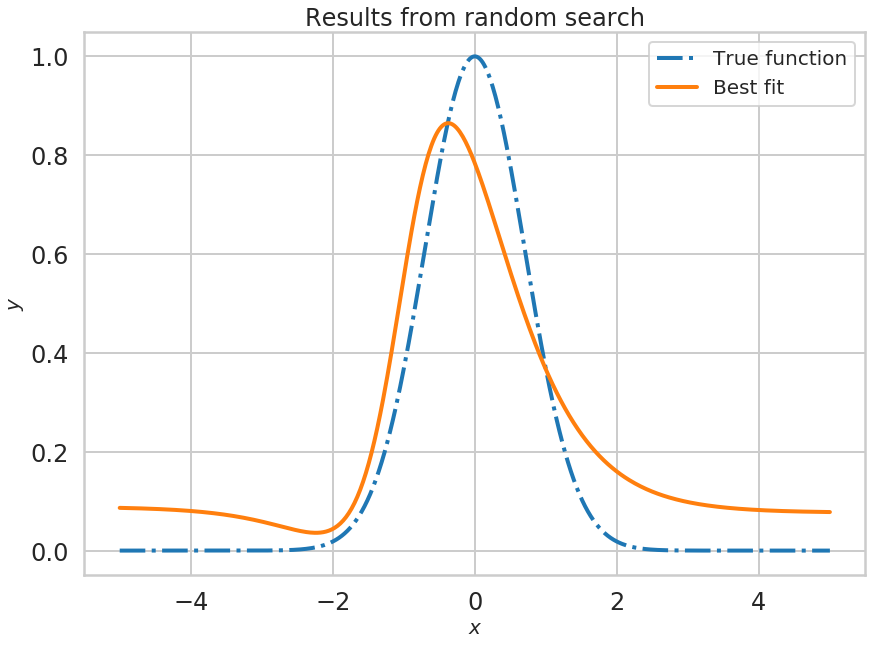

In [73]:
# Initialize the weights and biases
w = np.array([1.5, -2.5])
b = np.array([0.4, -2.0])

wout = np.array([-1.5, -1.5])
bout = np.array(1.25)

# Initiaize the plot
fig, ax = plt.subplots(1,1, figsize=(14,10))

rmse_min = 10^15 # Set a large RMSE to start
for n in range(100000):
    # Draw the weights and biases from a normal distribution
    w1 = np.random.normal(w[0], np.sqrt(0.1 * w[0] * w[0]))
    w2 = np.random.normal(w[1], np.sqrt(0.1 * w[1] * w[1]))
    b1 = np.random.normal(b[0], np.sqrt(0.1 * b[0] * b[0]))
    b2 = np.random.normal(b[1], np.sqrt(0.1 * b[1] * b[1]))

    w1o = np.random.normal(wout[0], np.sqrt(0.1 * wout[0] * wout[0]))
    w2o = np.random.normal(wout[1], np.sqrt(0.1 * wout[1] * wout[1]))
    bo = np.random.normal(bout, np.sqrt(0.1 * bout * bout))
    
    # Store the weights and biases in the necessary forms
    wnodes = np.array([w1, w2])
    bnodes = np.array([b1, b2])
    w_out = np.array([w1o, w2o])
    
    # Compute output of the network for these parameter values
    h = nodes(x, wnodes, bnodes)
    yout = output(h, w_out, bo)
    
    # Calculate the RMSE
    err = yout - f
    err2 = err * err
    errbar = err2.mean()
    rmse = np.sqrt(errbar)
    
    # If the RMSE decreased from the previous step, then save the 
    # parameters
    if rmse < rmse_min:
        w_star = wnodes
        b_star = bnodes
        wout_star = np.array([w1o, w2o])
        bout_star = bo
        
        rmse_min = rmse

print("The minimum RMSE was {0}".format(rmse_min))

# Recompute the best solution
h = nodes(x, w_star, b_star)
yout = output(h, wout_star, bout_star)

# Now plot everything
ax.plot(x, f, ls='-.', lw=4, label='True function')
ax.plot(x, yout, lw=4, label='Best fit')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)
ax.set_title('Results from random search', fontsize=24)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(loc=1, fontsize=20)

## Summary and What's Ahead

### Summary
In this lab, we built up some intuition for what a neural network is doing.  The following concepts were introduced and illustrated:
* Input
* Nodes (also called neurons) and layers
* Weights and biases
* Activation functions
* Output / prediction
We explored how the outputs of individual nodes are combined to give a final prediction.  The sensitivity of the output on the node weights and biases was illustrated with examples.

You should, however, have several lingering questions.  We didn't deeply explore the affect of different activation functions.  Also, there has got to be a better way of tuning the weights.  Randomly trying different weights didn't work so well and a grid search is way too expensive.  Plus, what's the deal with "deep" networks?  We played around with the width of a network, but what happens if we start putting nodes next to each other?

### What's Ahead
We will begin to explore some of these ideas.  We will dispense with writing our own neural network code for the time-being.  Instead, we will work with [`keras`](https://keras.io/): "a high-level neural networks API".  You will learn how to use `keras` to build bigger networks and how to actually train them using real data.

## I. Architectures Encoding Functions

**Motivating Question:** What exact kind of mathematical/statistical object is encoded by a neural network?

**Exercise #1:** For a network with the following architecture (a single output and one hidden layer), write the closed form expression for the function $f$ represented by the network.

Assume that the activation function at the output node is the identity funciton. Use the following notation:
- let $\mathbf{x}\in \mathbb{R}^D$ be the input; let the components of $\mathbf{x}$ be indexed by $d$
- let $H$ be the total number of hidden nodes, indexed by $h$
- let $\phi_h$ be the activation function at the hidden node $h$
- let $\mathbf{u}_h \mathbb{R}^D$ be the weights connecting the input to the $h$-th hidden node
- let $\mathbf{a} \mathbb{R}^H$ be the bias for the hidden layer
- let $\mathbf{v} \in \mathbb{R}^H$ be the weights connects the hidden nodes to the output
- let $b \in \mathbb{R}$ be the bias for the output layer
![](figs/single_hidden_layer.jpg)


**Your Answer Below**

**Solution:** 
For each hidden node $h$, a linear combination of the input, $\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}$, is transformed by the activation function $\phi_h$. Thus, the output of each hidden node $h$ is
$$
\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
$$
At the output node, a linear combination of the hidden nodes are taken. Since the activation function here is the identity, the final output of the MLP is
$$
\begin{aligned}
f(\mathbf{x}) = b + \sum_{h=1}^H v_h\phi_h(\mathbf{u}_h^\top \mathbf{x} + \mathbf{a}).
\end{aligned}
$$

## II. Regression

**Motivating Question:** We saw in Part I that each neural network represents a function that depends on our choice of activation function for each node. In practice, we choose the same activation function for all nodes, from a small set of simple functions. It makes sense to ask just how expressive such networks can be. That is, ***can any function be reasonably approximated by a neural network?*** For a fixed function, ***what kind of archicture do we need in order to approximate it?*** Deep (multiple layers) or wide (many hidden nodes in one layer)?
![](figs/activation-functions.png)

In [74]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# `Keras` Basics 

## Keras Installation

If you haven't already, please install `Keras` using the instructions found at [https://keras.io/#installation](https://keras.io/#installation)

Choose the TensorFlow installation instructions (found at [https://www.tensorflow.org/install/](https://www.tensorflow.org/install/) ).

Note the following:

* cuDNN is only required if your machine has an NVidia graphics card (GPU)
* For this tutorial, HDF5 and h5py are not required
* graphviz and pydot are not required

In [75]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

# Exploring Neural Networks
Let's try to redo the problem from last week.  Recall that we had a function $$f\left(x\right) = \exp\left(-x^{2}\right)$$ and we wanted to use a neural network to approximate that function.  This week, we will use `keras` to do the true optimization.

First, we import the necessary `keras` modules.

In [76]:
from keras import models
from keras import layers

Let's create a neural network model with `keras`.  We're going to use a single layer and just $2$ neurons in that layer.  To be consisten with last week, we will start with the sigmoid activation function.  We also choose a linear output layer like last time.  The loss function is selected to be the mean squared error.  In addition to these choices we must also specify our initial weights as well as the optimization method that will be used to minimize the loss function.

In [143]:
H = 2 # number of nodes in the layer
input_dim = 1 # input dimension: just x

model = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# layer 1
model.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model.compile(loss='mean_squared_error', optimizer='adam')

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


We can manually see the current weights on our neural network by using the `get_weights` function on our model.  We can set weights as we did above by using the `set_weights` function.

In [99]:
orig_params = model.get_weights()

orig_params

[array([[1., 1.]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[3.],
        [3.]], dtype=float32),
 array([2.], dtype=float32)]

In [100]:
model.set_weights([np.array([[1, 1]]), np.array([0.5,0.5]), np.array([[3],[3]]), np.array([2])])

In [101]:
model.get_weights()

[array([[1., 1.]], dtype=float32),
 array([0.5, 0.5], dtype=float32),
 array([[3.],
        [3.]], dtype=float32),
 array([2.], dtype=float32)]

Recall our weights and biases from earlier defined in the variables `w`, `b`, `wout` and `bout`

In [102]:
print('w: ', w)
print('b: ', b)
print('wout: ', wout_mixture)
print('bout: ', bout_mixture)

w:  [ 1.5 -2.5]
b:  [ 0.4 -2. ]
wout:  [-3.46 -3.38]
bout:  3.43


In [103]:
model.set_weights([np.array([w]), np.array(b), np.array(wout_mixture).reshape(-1,1), np.array([bout_mixture])])

In [104]:
model.get_weights()

[array([[ 1.5, -2.5]], dtype=float32),
 array([ 0.4, -2. ], dtype=float32),
 array([[-3.46],
        [-3.38]], dtype=float32),
 array([3.43], dtype=float32)]

**Exercise:**  Replicate a plot from above with a keras defined model while manually setting weights 

In [105]:
# Your code here

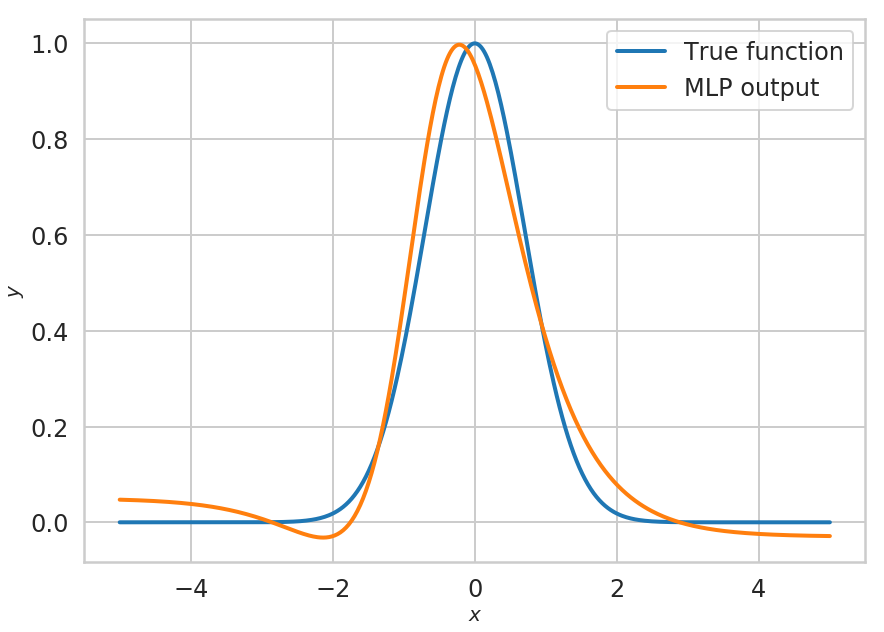

In [110]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f(x), lw=4, label='True function')
ax.plot(x, model.predict(x), lw=4, label=r'MLP output')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

Let's tune our network the standard way using gradient descent.

Before we get started, we need to create some data.  We will generate data points from an underlying function (here the Guassian).  Then we will use the `sklearn` `train_test_split` method to split the dataset into training and testing portions.  Remember that we train a machine learning algorithm on the training set and then assess the algorithm's performance on the test set.

In [116]:
from sklearn.model_selection import train_test_split

n_samples = 1000 # set the number of samples to take for each toy dataset
test_size = 0.3 # set the proportion of toy data to hold out for testing
random_seed = 1 # set the random seed to make the experiment reproducible 
np.random.seed(random_seed)

# define a function
f = lambda x: np.exp(-x * x)
X = np.random.permutation(np.linspace(-5, 5, n_samples)) # choose some points from the function - this is our toy dataset 
y = f(X)

# create training and testing data from this set of points
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

**Exercise**:  We had some question about which of the following two sets of parameters was a better fit to our unit gaussian loss function.  Use models defined in keras and `sklearn.metrics.mean_squared_error` and our test set above to determine the answer.

In [154]:
from sklearn.metrics import mean_squared_error

In [124]:
model_mixture = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model_mixture.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# layer 1
model_mixture.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model_mixture.compile(loss='mean_squared_error', optimizer='adam')

In [127]:
model_bestfit = models.Sequential() # create sequential multi-layer perceptron

# layer 0, our hidden layer
model_bestfit.add(layers.Dense(H, input_dim=input_dim, 
                kernel_initializer='normal', 
                activation='sigmoid')) 
# layer 1
model_bestfit.add(layers.Dense(1, kernel_initializer='normal', 
                activation='linear')) 

# configure the model
model_bestfit.compile(loss='mean_squared_error', optimizer='adam')

In [128]:
model_mixture.set_weights([np.array([w]), np.array(b), np.array(wout_mixture).reshape(-1,1), np.array([bout_mixture])])

In [129]:
model_bestfit.set_weights([np.array([w]), np.array(b), np.array(wout_kindafit).reshape(-1,1), np.array([bout_kindafit])])

In [130]:
mean_squared_error(model_mixture.predict(X_test), y_test)

0.0029304973019372094

In [131]:
mean_squared_error(model_bestfit.predict(X_test), y_test)

0.003132103386519936

**Exercise**:  Reset our model's parameters to their original state and train the model to find the optimal parameters.  Show the parameters and plot the resulting function approximation.  Use a batch_size of 100 and train for 1000 epochs

In [133]:
## Your code here

In [134]:
model.set_weights(orig_params)

In [144]:
# fit the model
model.fit(X_train, y_train, batch_size=100, epochs=1000, verbose=False)

In [145]:
model.get_weights()

[array([[-3.3110874,  3.2790463]], dtype=float32),
 array([2.5552478, 2.529237 ], dtype=float32),
 array([[1.1413194],
        [1.1416906]], dtype=float32),
 array([-1.1400373], dtype=float32)]

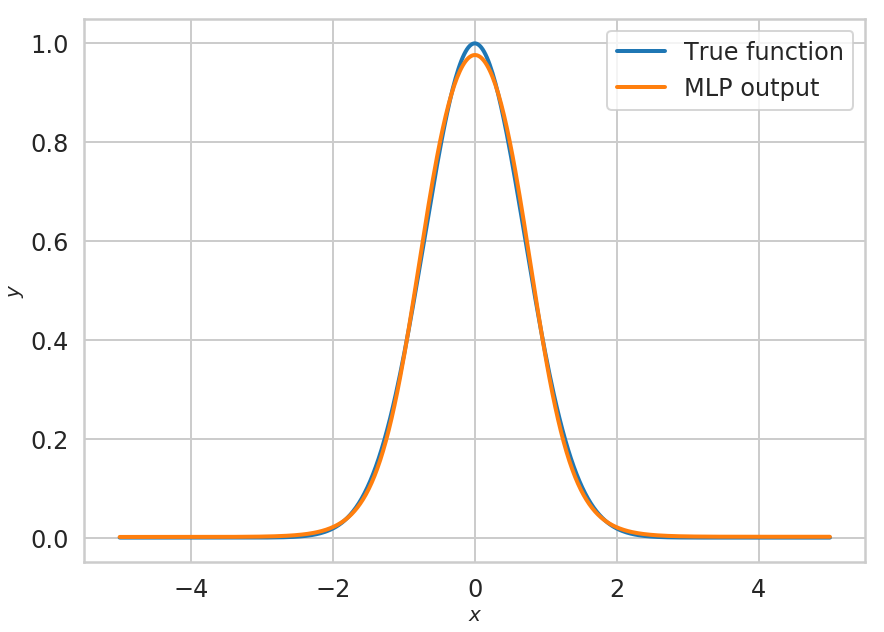

In [173]:
fig, ax = plt.subplots(1,1, figsize=(14,10))

ax.plot(x, f(x), lw=4, label='True function')
ax.plot(x, model.predict(x), lw=4, label=r'MLP output')

# Create labels (very important!)
ax.set_xlabel('$x$', fontsize=20) # Notice we make the labels big enough to read
ax.set_ylabel('$y$', fontsize=20)

ax.tick_params(labelsize=24) # Make the tick labels big enough to read

ax.legend(fontsize=24, loc=1) # Create a legend and make it big enough to read

In [153]:
mean_squared_error(model.predict(X_test),y_test )

5.094015221974599e-05

In [159]:
from scipy.signal import square

In [206]:
g = lambda x: square(2*x/np.pi) if (x >= 0 and x < 10) else 0

In [207]:
vg = np.vectorize(g)

In [211]:
vg(9.8)

array(-1.)

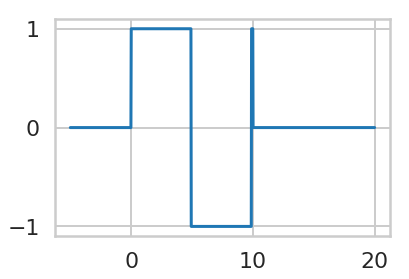

In [208]:
t= np.linspace(-5, 20,1000)
plt.plot(t, vg(t));

**Exercise**: Fit a model neural network model of the appropriate number of nodes to approximate vg.  Find the parameters and plot the model.

In [212]:
## Your code here